In [1]:
from time import sleep
import numpy as np
import urllib3
import matplotlib
from numpy import append
import config
import vectorbt as vbt
import pandas as pd
import pandas_ta as ta
from datetime import datetime
from alpaca_trade_api.rest import REST
import gym
import gym_anytrading
from tensorflow.keras.models import load_model

from stable_baselines import ACKTR
from stable_baselines.common.evaluation import evaluate_policy

c:\Users\90507\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\90507\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\90507\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\90507\AppD

,Close
Date,
2022-11-07 00:00:00+00:00,3.845370
2022-11-08 00:00:00+00:00,3.942000
2022-11-09 00:00:00+00:00,3.900000
2022-11-10 00:00:00+00:00,3.892500
2022-11-11 00:00:00+00:00,3.892500
2022-11-14 00:00:00+00:00,3.748952
2022-11-15 00:00:00+00:00,3.847000
2022-11-16 00:00:00+00:00,3.820000
2022-11-17 00:00:00+00:00,3.829000


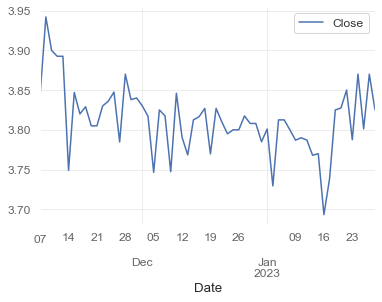

In [2]:
data = vbt.YFData.download(symbols= 'PEN=X', period="60d")
X=data.data['PEN=X'].index
Y=data.data['PEN=X'].Close
data.data['PEN=X'].reset_index().plot(x='Date', y='Close')
X=data.data['PEN=X']
solDF = pd.DataFrame(X['Close'])
solDF

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
testingSet = pd.DataFrame(solDF)
testing_set_scaled = sc.fit_transform(testingSet)
testing_set_scaled

array([[0.61142574],
       [1.        ],
       [0.83110761],
       [0.80094743],
       [0.80094743],
       [0.22370284],
       [0.61797971],
       [0.50940576],
       [0.5455974 ],
       [0.44908732],
       [0.44908732],
       [0.54961837],
       [0.57374613],
       [0.61999116],
       [0.36758447],
       [0.71046882],
       [0.58178904],
       [0.58983098],
       [0.54961837],
       [0.49734188],
       [0.21355741],
       [0.52951255],
       [0.49935333],
       [0.21737801],
       [0.61395874],
       [0.39096729],
       [0.30201691],
       [0.47924654],
       [0.49533139],
       [0.53755449],
       [0.30716057],
       [0.53755449],
       [0.46919315],
       [0.40887471],
       [0.42898054],
       [0.42898054],
       [0.49935333],
       [0.4611512 ],
       [0.4611512 ],
       [0.3686621 ],
       [0.43300247],
       [0.14536864],
       [0.47924654],
       [0.47924654],
       [0.42898054],
       [0.37670405],
       [0.38876793],
       [0.376

In [4]:
inputs = solDF[0:].values     #lstm input shape edit
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = np.array(inputs)
X_test = np.reshape(X_test, (int(X_test.size/60), 60,1))

C:\Users\90507\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [5]:
sol_model = load_model('Sol_BOT.bot')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
predicted_close_value = np.array([])
#predicted_close_value = sol_model.predict(X_test)
for i in range(0,7):
    predicted_close_value = sol_model.predict(X_test)
    X_test = np.append(X_test,predicted_close_value)
    X_test = X_test[1:]
    X_test = np.reshape(X_test, (1,60,1))

In [7]:
predicted_close_value = sc.inverse_transform(X_test[0][-7:])

In [8]:
predicted_close_value = pd.DataFrame(predicted_close_value)
predicted_close_value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       7 non-null      float64
dtypes: float64(1)
memory usage: 184.0 bytes


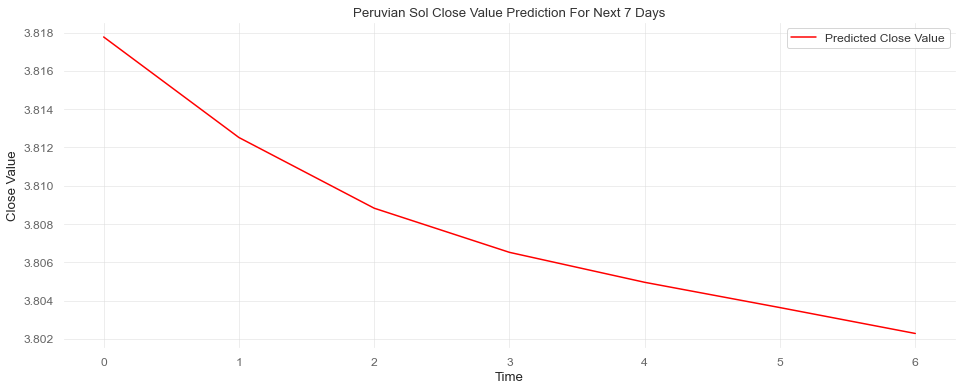

In [9]:
import matplotlib.pyplot as plt
figure = plt.figure()
figure.set_figwidth(16)
figure.set_figheight(6)
plt.plot(predicted_close_value, color='red', label='Predicted Close Value')
plt.title('Peruvian Sol Close Value Prediction For Next 7 Days')
plt.xlabel('Time')
plt.ylabel('Close Value')
plt.legend()
plt.show()

In [10]:
current_value_SOL = solDF["Close"][-1]
next_week_SOL = np.array([])
for i in range(predicted_close_value.size):
    next_week_SOL = np.append(next_week_SOL, 100 * (predicted_close_value[0][i]-current_value_SOL) / current_value_SOL)
    current_value_SOL = predicted_close_value[0][i]
print(next_week_SOL)
%store next_week_SOL

[-0.18905597 -0.13751699 -0.09681745 -0.06050942 -0.04110869 -0.03469153
 -0.03551568]
Stored 'next_week_SOL' (ndarray)
